In [1]:
import yfinance as yf              #Dowload Data from Yahoo Finance
import numpy as np                 #Calculation of data
import pandas as pd                #Changing DataFrame
import matplotlib as mpl           #Making Static Figures
import matplotlib.pyplot as plt    #Visuliazing Data

In [2]:
crypto_data = yf.download ( 'ETH-USD',start='2021-11-25',end ='2022-11-25')  #download data for 1year

[*********************100%***********************]  1 of 1 completed


In [3]:
crypto_data.head()       # Checking download data (First 5)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-25,4271.394531,4550.518066,4249.774414,4274.743164,4274.743164,18705358318
2021-11-26,4522.208984,4550.842285,3933.506592,4030.908936,4030.908936,26281795488
2021-11-27,4042.999023,4187.684082,4033.513916,4096.912109,4096.912109,16515693874
2021-11-28,4101.648926,4297.916504,3989.969971,4294.453613,4294.453613,15953126340
2021-11-29,4296.946777,4460.848633,4284.504883,4445.104980,4445.104980,19086475837


In [4]:
crypto_data.tail()    # Checking download data (Last 5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-20,1218.436279,1224.077759,1137.933228,1142.466675,1142.466675,9651002684
2022-11-21,1142.395752,1142.395752,1084.857300,1108.353027,1108.353027,14080099208
2022-11-22,1107.895996,1136.442627,1081.138184,1135.173462,1135.173462,12040670755
2022-11-23,1135.421509,1184.997314,1130.022827,1183.199585,1183.199585,11242676044
2022-11-24,1183.345093,1211.627441,1180.379761,1203.983154,1203.983154,9706372376


In [5]:
crypto_data['Adj Close'].head() #Categorising Single Adjusted Coloumn which excludes dividend,splits & new offerings.

Date
2021-11-25    4274.743164
2021-11-26    4030.908936
2021-11-27    4096.912109
2021-11-28    4294.453613
2021-11-29    4445.104980
Name: Adj Close, dtype: float64

In [6]:
eth_data = pd.DataFrame(crypto_data['Adj Close'])   # Transfering Cryptodata to New DataFrame
eth_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-11-25 to 2022-11-24
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [7]:
eth_data.head()

,Adj Close
Date,
2021-11-25,4274.743164
2021-11-26,4030.908936
2021-11-27,4096.912109
2021-11-28,4294.453613
2021-11-29,4445.104980


In [8]:
eth_data.tail()

,Adj Close
Date,
2022-11-20,1142.466675
2022-11-21,1108.353027
2022-11-22,1135.173462
2022-11-23,1183.199585
2022-11-24,1203.983154


Text(0.5, 1.0, 'Movement of Ethereum BitCoin')

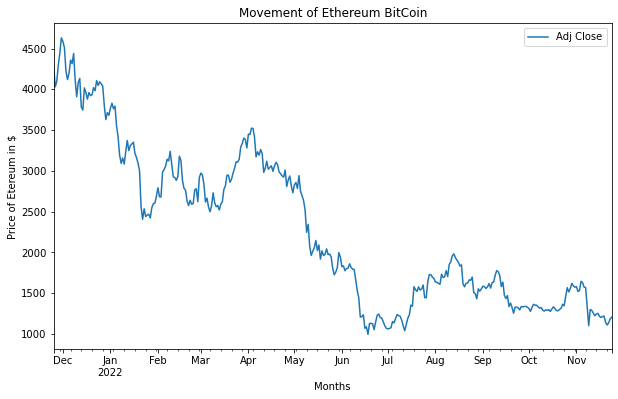

In [9]:
eth_data.plot(figsize=(10,6), subplots='True')
plt.xlabel('Months')
plt.ylabel('Price of Etereum in $')
plt.title('Movement of Ethereum BitCoin')


In [10]:
eth_data.describe().round(2)   #Checking Statistical Description

,Adj Close
count,365.00
mean,2276.51
std,955.32
min,993.64
25%,1441.81
50%,1957.25
75%,3009.39
max,4631.48


In [11]:
eth_data.diff().head() #Checking Difference in Price. We dont have Adj Close Price for 2021-11-25

,Adj Close
Date,
2021-11-25,NaN
2021-11-26,-243.834229
2021-11-27,66.003174
2021-11-28,197.541504
2021-11-29,150.651367


In [12]:
eth_data.diff().tail()

,Adj Close
Date,
2022-11-20,-75.960083
2022-11-21,-34.113647
2022-11-22,26.820435
2022-11-23,48.026123
2022-11-24,20.783569


In [13]:
eth_data.pct_change().round(4).head().dropna() #Percentage Change and Dropping 2021-11-25 from data as we dont have price

,Adj Close
Date,
2021-11-26,-0.0570
2021-11-27,0.0164
2021-11-28,0.0482
2021-11-29,0.0351


In [14]:
rets = np.log(eth_data/eth_data.shift(1)).dropna()  #Calculating Log Return
rets.head().round(4)

,Adj Close
Date,
2021-11-26,-0.0587
2021-11-27,0.0162
2021-11-28,0.0471
2021-11-29,0.0345
2021-11-30,0.0411


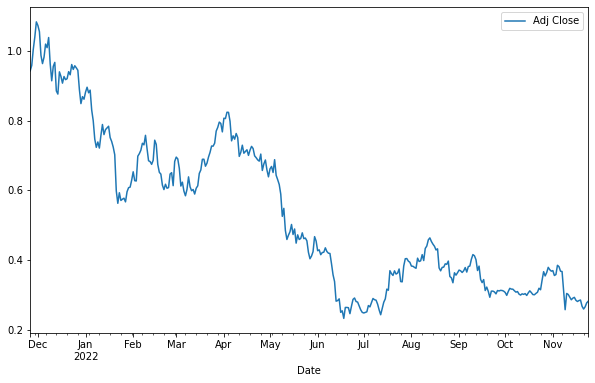

In [15]:
rets.cumsum().apply(np.exp).plot(figsize=(10,6));  #Log Return Figure for 1year Ajusted close

In [16]:
ethereum_data = pd.DataFrame(eth_data).dropna()#Changing data from Series to DataFrame
ethereum_data.head().round(2)

,Adj Close
Date,
2021-11-25,4274.74
2021-11-26,4030.91
2021-11-27,4096.91
2021-11-28,4294.45
2021-11-29,4445.10


In [17]:
ethereum_data.tail().round(2)

,Adj Close
Date,
2022-11-20,1142.47
2022-11-21,1108.35
2022-11-22,1135.17
2022-11-23,1183.20
2022-11-24,1203.98


In [18]:
ethereum_data.describe().round(2)

,Adj Close
count,365.00
mean,2276.51
std,955.32
min,993.64
25%,1441.81
50%,1957.25
75%,3009.39
max,4631.48


Text(0.5, 1.0, 'Movement of Closed Price')

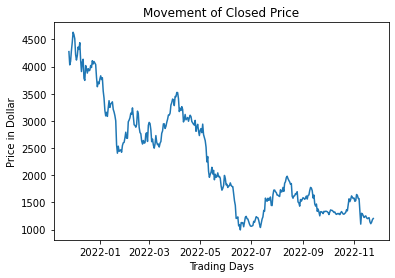

In [19]:
fig = plt.figure()
plt.plot(ethereum_data)
plt.xlabel('Trading Days')
plt.ylabel('Price in Dollar')
plt.title('Movement of Closed Price')

# Normal Return , Log Return & Annualised Volatility

In [20]:
ethereum_data = pd.DataFrame(eth_data).dropna()
ethereum_data.head().round(2)

,Adj Close
Date,
2021-11-25,4274.74
2021-11-26,4030.91
2021-11-27,4096.91
2021-11-28,4294.45
2021-11-29,4445.10


In [21]:
len(ethereum_data)

365

In [22]:
normal_return = []
for i in range (0,len(ethereum_data)-1):
    adjclose_yesterday = ethereum_data.iloc[i]['Adj Close']
    adjclose_today = ethereum_data.iloc[i+1]['Adj Close']
    x = (adjclose_today-adjclose_yesterday)/adjclose_yesterday
    normal_return.append(x)
normal_return[:5]


[-0.05704067335916791,
 0.016374265676426233,
 0.048217169085520296,
 0.035080450449292956,
 0.041927923919998465]

In [23]:
log_return = []
for i in range (0,len(ethereum_data)-1):
    adjclose_yesterday = ethereum_data.iloc[i]['Adj Close']
    adjclose_today = ethereum_data.iloc[i+1]['Adj Close']
    x = (np.log(adjclose_today/adjclose_yesterday))
    log_return.append(x)
log_return[:5]

[-0.05873212915499167,
 0.01624165305284872,
 0.04709078684110003,
 0.034479153599218576,
 0.04107277003664529]

In [24]:
ethereum_data_NR = pd.DataFrame(normal_return,columns = ['normal return'])
NR = ethereum_data_NR.mean()*len(ethereum_data_NR)
NV = ethereum_data_NR.std()*(len(ethereum_data_NR)**0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (NR,NV))


The annulized normal return is -0.87700450 and its annulized volatility is 0.87785163


Text(0.5, 1.0, 'Normal Return')

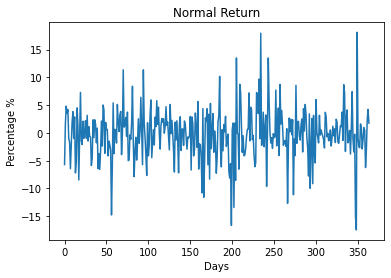

In [25]:
fig = plt.figure()
plt.plot(ethereum_data_NR * 100)
plt.xlabel('Days')
plt.ylabel('Percentage %')
plt.title('Normal Return')


In [26]:
ethereum_data_LR = pd.DataFrame(log_return, columns = ['log']) 
lr = ethereum_data_LR.mean() * len(ethereum_data_LR)
lv = ethereum_data_LR.std() * (len(ethereum_data_LR) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is -1.26708867 and its annulized volatility is 0.88556040


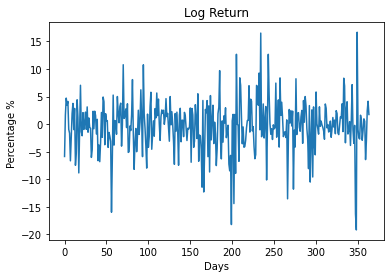

In [27]:
fig = plt.figure() #Daily log return 
plt.plot(ethereum_data_LR * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

In [28]:
ethereum_data['SMA1'] = eth_data.rolling(window=20).mean()
ethereum_data['SMA2'] = eth_data.rolling(window=60).mean()
ethereum_data[['SMA1', 'SMA2']].tail()

,SMA1,SMA2
Date,,
2022-11-20,1351.228473,1355.921554
2022-11-21,1327.660895,1352.266101
2022-11-22,1308.433978,1349.048000
2022-11-23,1291.016870,1346.801438
2022-11-24,1268.961359,1345.297544


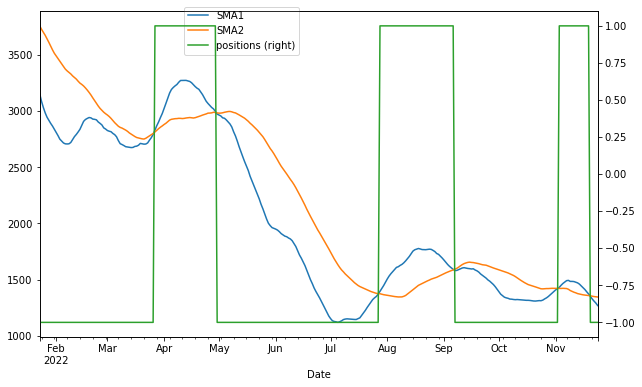

In [29]:
ethereum_data.dropna(inplace=True)
ethereum_data['positions'] = np.where(ethereum_data['SMA1'] > ethereum_data['SMA2'],1,-1)
ax = ethereum_data[['SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

# Binomial Model

In [30]:
import os
import matplotlib.pyplot as plt

In [31]:
ethereum_data['Adj Close'][-1]

1203.983154296875

In [32]:
S0 = ethereum_data['Adj Close'][-1]         # spot asset price approximetly 1203.98
K = 1205                                     # strike
T = 7/365                                   # maturity 
r = 0.0432                                  # risk free rate 
sig = 0.877                                  # diffusion coefficient or volatility
N = 7                                       # number of periods or number of time steps  
payoff = "call"                             # payoff 

In [33]:
dT = float(T) / N                           # Delta t 
u = np.exp(sig * np.sqrt(dT))               # up factor
d = 1.0 / u                                 # down factor 

In [34]:
u

1.0469741877087195

In [35]:
d

0.9551333850822803

In [36]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [37]:
S

array([[1203.9831543 , 1260.53928498, 1319.75209397, 1381.74637656,
        1446.65279022, 1514.60812994, 1585.75561654, 1660.24519853],
       [   0.        , 1149.96450575, 1203.9831543 , 1260.53928498,
        1319.75209397, 1381.74637656, 1446.65279022, 1514.60812994],
       [   0.        ,    0.        , 1098.3694911 , 1149.96450575,
        1203.9831543 , 1260.53928498, 1319.75209397, 1381.74637656],
       [   0.        ,    0.        ,    0.        , 1049.0893701 ,
        1098.3694911 , 1149.96450575, 1203.9831543 , 1260.53928498],
       [   0.        ,    0.        ,    0.        ,    0.        ,
        1002.02028132, 1049.0893701 , 1098.3694911 , 1149.96450575],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  957.06302322, 1002.02028132, 1049.0893701 ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,  914.1228451 ,  957.06302322],
       [   0.        ,    0.        ,    

In [38]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p.round(4)

0.4898

In [40]:
q.round(4) #risk neutral down probability

0.5102

In [41]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        , 455.24519853],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        , 309.60812994],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        , 176.74637656],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  55.53928498],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.       

In [42]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V


array([[ 60.39627444,  89.99971086, 129.9772762 , 181.0436284 ,
        242.08057181, 309.89333454, 380.89822728, 455.24519853],
       [  0.        ,  31.98884783,  51.6392387 ,  80.98004201,
        122.48575345, 177.03158116, 241.79540096, 309.60812994],
       [  0.        ,   0.        ,  13.13047378,  23.48192722,
         41.15034657,  70.14623326, 114.89470471, 176.74637656],
       [  0.        ,   0.        ,   0.        ,   3.19537659,
          6.52441546,  13.32174655,  27.2007404 ,  55.53928498],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.       

In [43]:
print('European ' + payoff, str( V[0,0].round(2)))

European call 60.4


# Black Scholes Model

In [44]:
import scipy.stats as si
import matplotlib.pyplot as plt

In [45]:
S=S0
K=1205
T=7/365
r=0.0432
q=0
Vol= vol = 0.877
payoff='call'

In [46]:
def euro_option_bs(S, K, T, r, v, payoff):
    
    #S: spot price given at 1203.98
    #K: strike price for the option: 1205
    #T: time to maturity is one week
    #r: risk free rate from bloomberg US is given at 4.32%
    #vol: volatility of underlying asset which is calculated above
    #payoff: call or put (We go for a "call" as payoff)
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [47]:
euro_option_bs(ethereum_data['Adj Close'][-1], K, T, r, vol, 'call')

58.29062714526299

In [49]:
S = np.linspace(1000,1400,11) #spot price from 1000 up to 1400 ,distributed over 11points.
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], K, T, r, 0.877, 'call')

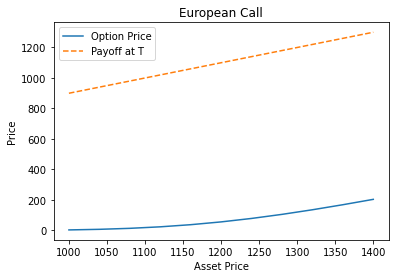

In [50]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Asset Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

# 2D Movement

In [51]:
import scipy.stats as si

# Delta

In [52]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [53]:
delta(ethereum_data['Adj Close'][-1] , 1205, 7/365, 0.0432, 0, 0.877, 'call') #Delta value for call option

0.524159611994675

In [54]:
S = np.linspace(1000,1400,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 1205, 7/365, 0.0432, 0, 0.877, 'call')
    Delta_Put [i] = delta(S[i], 1205, 7/365, 0.0432, 0, 0.877, 'put')

In [55]:
S

array([1000., 1040., 1080., 1120., 1160., 1200., 1240., 1280., 1320.,
       1360., 1400.])

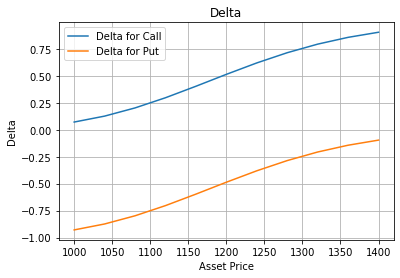

In [56]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '-')
plt.grid()
plt.xlabel('Asset Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [57]:
delta(ethereum_data['Adj Close'][-1] , 1205, 7/365, 0.0432, 0, 0.877, 'call') - delta(ethereum_data['Adj Close'][-1] , 1205, 7/365, 0.0375, 0, 0.877, 'put') #put call

1.0003584283534068

# Gamma

In [58]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [59]:
gamma(ethereum_data['Adj Close'][-1] , 1205, 7/365, 0.0432, 0, 0.877, 'call') #Delta value for call option

0.0027232664179809916

In [60]:
S = np.linspace(1000,1400,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i],  1205, 7/365, 0.0432, 0, 0.877, 'call')

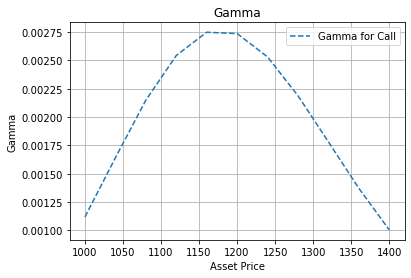

In [61]:
fig = plt.figure()
plt.plot(S, Gamma, '--')
plt.grid()
plt.xlabel('Asset Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

# Speed

In [62]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [63]:
speed(ethereum_data['Adj Close'][-1] , 1205, 7/365, 0.0432, 0, 0.877, 'call')

-4.6952089738400345e-07

In [64]:
S = np.linspace(1000,1400,11) 
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 1205, 7/365, 0.0432, 0, 0.877, 'call')


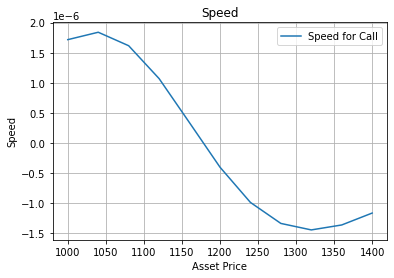

In [65]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Asset Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call'])

# Theta

In [66]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [67]:
theta(ethereum_data['Adj Close'][-1] ,1205, 7/365, 0.0432, 0, 0.877, 'call')  #Same outcome for put and call as the equations is the same for bought of them. 

1542.8436417096989

In [68]:
T = np.linspace(3/365,6/365,12) #make sense
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(ethereum_data['Adj Close'][-1] , 1205, T[i],0.0432, 0, 0.877, 'call')
    Theta_Put [i] = theta(ethereum_data['Adj Close'][-1] , 1.5,  T[i], 0.0154, 0, 0.877, 'put')

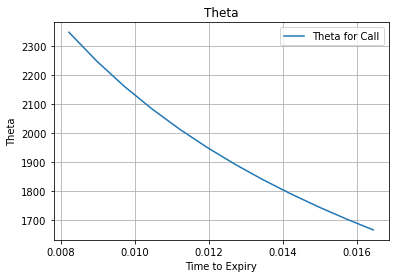

In [69]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

# Rho

In [70]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [71]:
rho(ethereum_data['Adj Close'][-1] , 1205, 7/365, 0.0432, 0, 0.877, 'call')

10.984989071270638

In [72]:
r = np.linspace(0.0400,0.0475,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(ethereum_data['Adj Close'][-1] , 1205, 7/365, r[i], 0, 0.877, 'call')
    Rho_Put [i] = rho(ethereum_data['Adj Close'][-1] , 1205, 7/365, r[i], 0, 0.877, 'put')

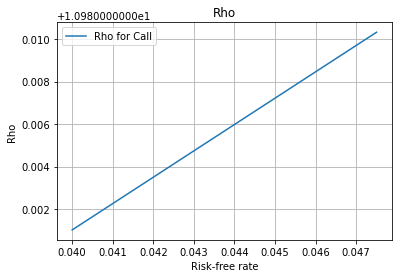

In [73]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Risk-free rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

# Vega

In [74]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [75]:
vega(ethereum_data['Adj Close'][-1] , 1205, 7/365, 0.0432, 0, 0.877, 'call')

66.39505277513375

In [76]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(ethereum_data['Adj Close'][-1] , 1205, 7/365, 0.0432, 0, vol[i], 'call')

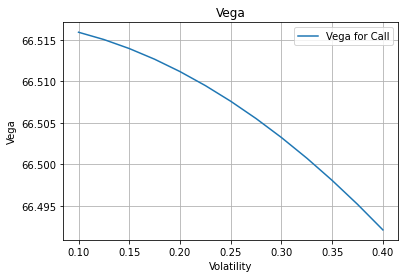

In [77]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])

# 3D Movement

# Delta

In [78]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [79]:
S = np.linspace(1000, 1400, 11)
T = np.linspace(3/365,6/365,11)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 1205, T[i], 0.0432, 0.0, 0.877, 'call')

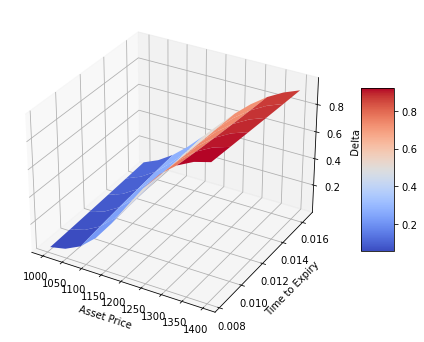

In [80]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Asset Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [81]:
d = delta(ethereum_data['Adj Close'][-1], 1205, 7/365, 0.0432, 0.0, 0.877, 'call')
print('The value of Delta is', d.round(4),'.','If the asset price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.5242 . If the asset price increase 1 dollar, then the value of the option will increase $ 0.5242 .


In [82]:
d = delta(ethereum_data['Adj Close'][-1], 1205, 7/365, 0.0432, 0.0, 0.877, 'put')
d

-0.475840388005325

# Gamma

In [83]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [84]:
S = np.linspace(1000, 1400, 11)
T = np.linspace(3/365,6/365,11)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 1205, T[i], 0.0432, 0.0, 0.877, 'call')

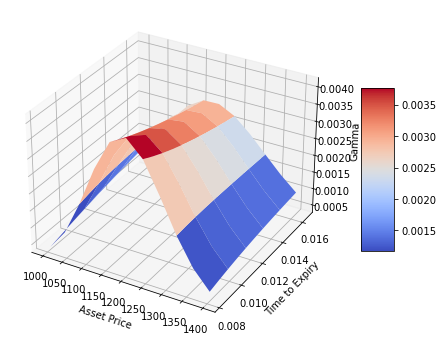

In [85]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Asset Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [86]:
g = gamma(ethereum_data['Adj Close'][-1], 1205 ,7/365 , 0.0432, 0.0, 0.877, 'call')
g
#Gamma is one of the Option Greeks, and it measures the rate of change of the Delta of the option with respect to a move in the underlying asset. Specifica

0.0027232664179809916

In [87]:
print('The value of Gamma is', g.round(4),'.','If the asset price increase 0.5 dollar, then the value of Delta will increase ', (d.round(4)*0.5), '.')

The value of Gamma is 0.0027 . If the asset price increase 0.5 dollar, then the value of Delta will increase  -0.2379 .


# Speed

In [88]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [89]:
S = np.linspace(1000, 1400, 11)
T = np.linspace(3/365,6/365,11)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 1205, T[i], 0.0432, 0.0, 0.877, 'call')

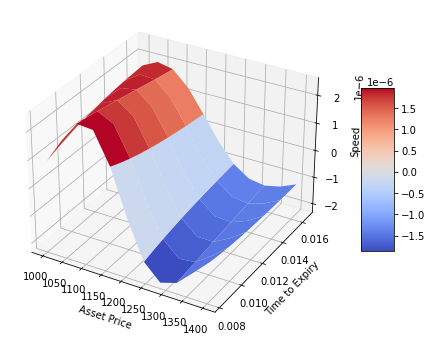

In [90]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Asset Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [91]:
s = speed(ethereum_data['Adj Close'][-1], 1205 ,7/365 , 0.0432, 0.0, 0.877, 'call')
s

-4.6952089738400345e-07

In [92]:
print('The value of Speed is', s.round(8),'.','If the asset price increase 0.1 dollar, then the value of Gamma will decrease ', d.round(4), '.')

The value of Speed is -4.7e-07 . If the asset price increase 0.1 dollar, then the value of Gamma will decrease  -0.4758 .


# Theta

In [93]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [94]:
S = np.linspace(1000, 1400, 11)
T = np.linspace(3/365,6/365,11)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 1205, T[i], 0.0432, 0.0, 0.877, 'call')

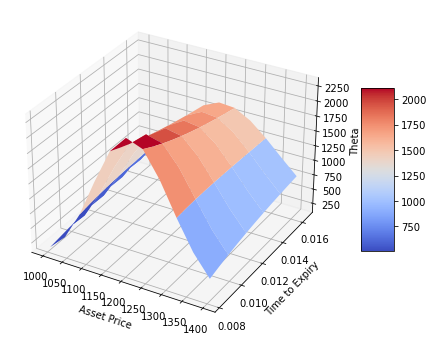

In [95]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Asset Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [96]:
t = theta(ethereum_data['Adj Close'][-1], 1205 ,7/365 , 0.0432, 0.0, 0.877, 'call')
t

1542.8436417096989

In [97]:
t/365

4.226968881396435

In [98]:
print('The value of Theta is', t.round(4),'.','For each day it gets closer to maturity, then the value of the option will increase $', (t/365).round(4))

The value of Theta is 1542.8436 . For each day it gets closer to maturity, then the value of the option will increase $ 4.227


# Rho

In [99]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [100]:
S = np.linspace(1000, 1400, 11)
r = np.linspace(0.0400,0.0475,11)
Rho = np.zeros((len(r),len(S)))
for j in range(len(S)):
    for i in range(len(r)):
        Rho[i,j] = rho(S[j], 1205, 7/365, r[i], 0.0, 0.877, 'call')


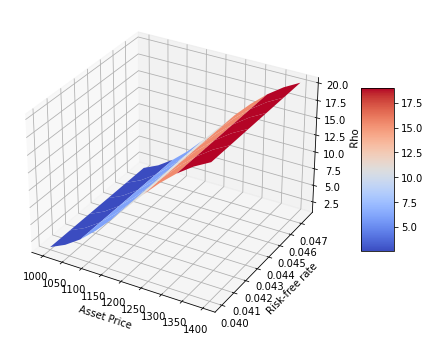

In [101]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, r = np.meshgrid(S, r)
surf = ax.plot_surface(S, r, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Asset Price')
ax.set_ylabel('Risk-free rate')
ax.set_zlabel('  Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [102]:
Roh_ = rho(ethereum_data['Adj Close'][-1], 1205 ,7/365 , 0.0432, 0.0, 0.877, 'call')
Roh_

10.984989071270638

In [103]:
print('The value of Rho is', Roh_.round(4),'.','If the risk-free rate increases , then the value of the option will increase $', Roh_.round(4)*0.01, '.')

The value of Rho is 10.985 . If the risk-free rate increases , then the value of the option will increase $ 0.10985 .


# Vega

In [104]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [105]:
S = np.linspace(1000, 1400, 11)
vol = np.linspace(0.5,1.5,11)
Vega = np.zeros((len(vol),len(S)))
for j in range(len(S)):
    for i in range(len(vol)):
        Vega[i,j] = vega(S[j], 1205, 7/365, 0.0432, 0.0, vol[i], 'call')

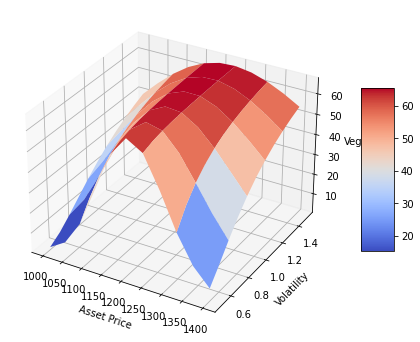

In [106]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, vol = np.meshgrid(S, vol)
surf = ax.plot_surface(S, vol, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Asset Price')
ax.set_ylabel('Volatility')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [107]:
v = vega(ethereum_data['Adj Close'][-1], 1205 ,7/365 , 0.0432, 0.0, 0.877, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 66.3951 . If the volatility increases 1%, then the value of the option will increase $ 0.663951 .
